(lecture04:histograms)=
# Histograms

Histograms offer a nice way to summarize the uncertainty/variability in scalar variables.
I am assuming that you have seen histograms in the past.
They work as follows:
- you split the interval in which your variable takes values in bins.
- you count how many times the variable falls inside its bin.

Let's look at some examples. First, set up our environment as usual, download and clean the dataset we introduced in {ref}`lecture03:pandas`:

In [16]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

In [17]:
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/temp_price.csv'

import pandas as pd
temp_price = pd.read_csv('temp_price.csv')
clean_data = temp_price.dropna(axis=0).rename(columns={'Price per week': 'week_price',
                                                       'Price per day': 'daily_price'})
clean_data.head().round(2)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4126  100  4126    0     0  16835      0 --:--:-- --:--:-- --:--:-- 16840


household        date  score  t_out  t_unit    hvac  price  week_price  \
0        a1  2019-01-06     85   38.6   71.58   35.11   0.17        6.08   
1       a10  2019-01-06     70   38.6   73.29   63.95   0.17       11.07   
2       a11  2019-01-06     61   38.6   74.25  147.61   0.17       25.54   
3       a12  2019-01-06     65   38.6   73.71   74.39   0.17       12.87   
4       a13  2019-01-06     66   38.6   73.55  173.10   0.17       29.95   

   daily_price  
0         0.87  
1         1.58  
2         3.65  
3         1.84  
4         4.28

Let's do the histogram of `t_unit` first:

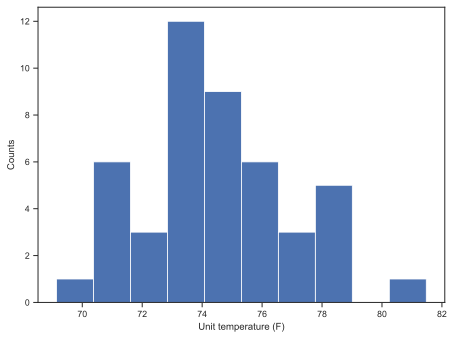

In [18]:
fig, ax = make_full_width_fig()
ax.hist(clean_data['t_unit'])
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Counts')
save_for_book(fig, 'ch4.fig7')

It is straightforward to read this.
Each bar gives you the number of households with internal temperature that fall with a bin.

Some times, we want to normalize the height of the bars so that the total area covered by the histogram is one.
To do this, you need to divide by the total number of observations and by the width of each bin.
What we get is a density.
We will see in later lectures that this is an approximation of a probability density of a random variable.
To get the density you need to use the keyword `density=True` in `hist`.
Here is how:

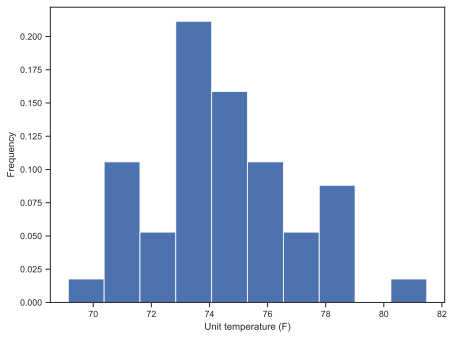

In [19]:
fig, ax = make_full_width_fig()
ax.hist(clean_data['t_unit'], density=True)
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
save_for_book(fig, 'ch4.fig8')

You can also change the bin number. 
The default is 10. Let's make it 5.

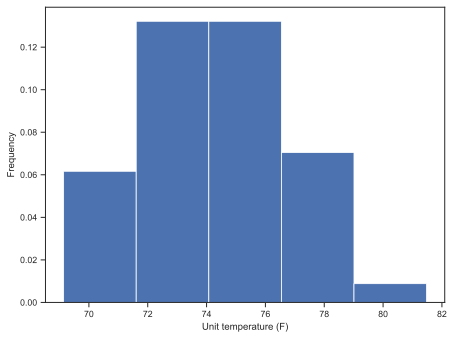

In [20]:
fig, ax = make_full_width_fig()
ax.hist(clean_data['t_unit'], density=True, bins=5)
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
save_for_book(fig, 'ch4.fig9')

Alternatively, you can also specify the bins on your own.
You just have to provide the bin edges.
Let's pick: $(65, 72, 76, 82)$.
Here we go:

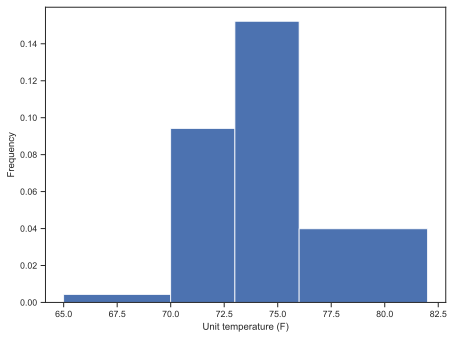

In [21]:
fig, ax = make_full_width_fig()
ax.hist(clean_data['t_unit'], density=True, bins=(65, 70, 73, 76, 82))
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
save_for_book(fig, 'ch4.fig10')

Let's plot a few more things on our histogram.
For example, let's plot the raw data as points on the x-axis.
Here is how we can do that:

(-0.005, 0.16)

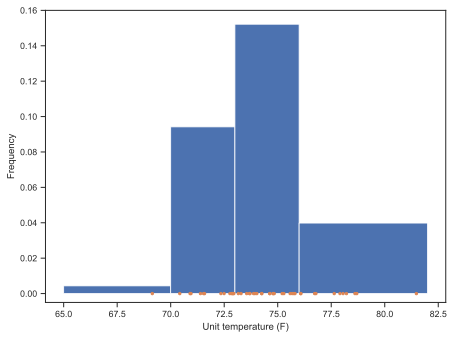

In [22]:
import numpy as np

fig, ax = make_full_width_fig()
ax.hist(clean_data['t_unit'], density=True, bins=(65, 70, 73, 76, 82))
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
# Add a plot of points with x axis being the temperatures and the
# y axis being zeros
ax.plot(clean_data['t_unit'], np.zeros(clean_data.shape[0]), '.')
# Move the plotting range a bit to the negative so that we can see the points
ax.set_ylim(-0.005, 0.16)

This is nice. Let's add some more information here.
What about using a big red cross for marking the avarege temperature?
Let's do it!

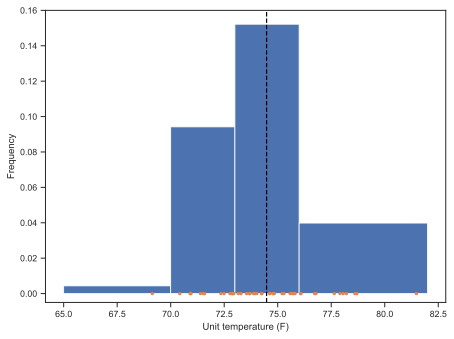

In [23]:
average_unit_T = clean_data['t_unit'].mean()

# Same us before
fig, ax = make_full_width_fig()
ax.hist(clean_data['t_unit'], density=True, bins=(65, 70, 73, 76, 82))
ax.set_xlabel('Unit temperature (F)')
ax.set_ylabel('Frequency')
ax.plot(clean_data['t_unit'], np.zeros(clean_data.shape[0]), '.')
ax.set_ylim(-0.005, 0.16)

# But now I am adding the red cross at the average
ax.axvline(clean_data['t_unit'].mean(), color='k', linestyle='--')

save_for_book(fig, 'ch4.fig11')

There is no limit to what you can plot with matplotlib!

## Questions

Write some code to draw the histogram of the `score`.